In [23]:
import numpy as np
from numpy import array
from numpy import mean
from numpy import var
from numpy import std
from numpy import cov
from numpy import corrcoef

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline  


In [24]:
np.set_printoptions(precision=2)

In [25]:
# Consider the matrix of 8 observations each of 2 
# variables, x1 and x2 
# whose observed values are held in the 2 rows 
# of the array X:

X = np.array([ [ 1, 1, 2,   -1, -1.5, .3,  .3, -.3],
               [.3, 1, 1.3, .2,   -1, .3, -.7,  1]
             ])

No handles with labels found to put in legend.


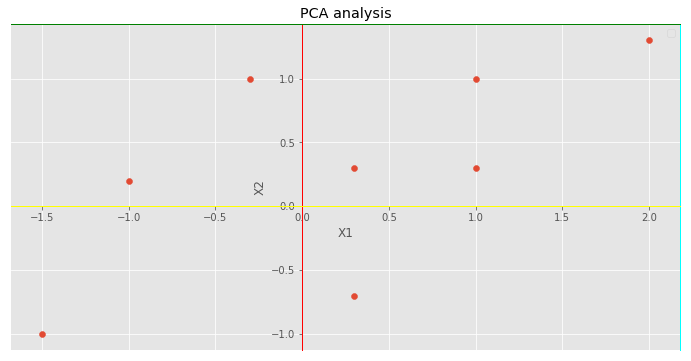

In [26]:
# select the style of the plot
style.use('ggplot')

f, ax = plt.subplots(figsize=(12, 6))

# plot the random number
plt.scatter(X[0], X[1])

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('red')

ax.spines['right'].set_color('cyan')

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('yellow')

ax.spines['top'].set_color('green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA analysis')
plt.legend();

In [27]:
COV = np.cov(X)

In [19]:
COV

array([[1.3 , 0.61],
       [0.61, 0.67]])

In [28]:
# multiply the COV with any vector , say [-1, 1]
v = np.array([[-1, 1]]).ravel()
v

array([-1,  1])

In [29]:
multv = np.dot(COV, v)
multv

array([-0.7 ,  0.06])

Starting slope ev :  0.437
Starting slope ev :  0.573
Starting slope ev :  0.6
Starting slope ev :  0.604
Starting slope ev :  0.605
slopes nearing ev :  0.605
Starting slope ev :  0.606
slopes nearing ev :  0.606
slopes nearing ev :  0.606
slopes nearing ev :  0.606
slopes nearing ev :  0.606
slopes nearing ev :  0.606
End Iterations :  12


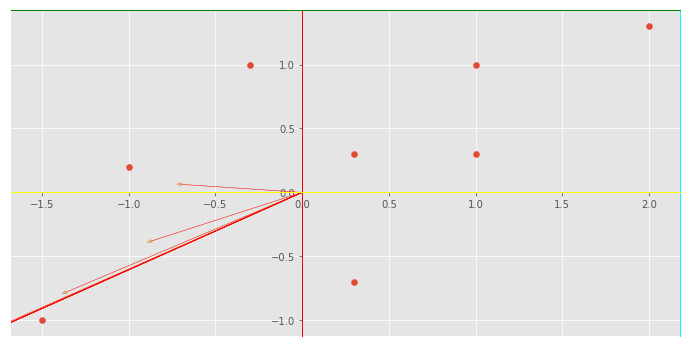

In [30]:
multv = np.dot(COV, v)
np.round(multv, 3)

slope = np.round(multv[1]/multv[0], 3)

f, ax = plt.subplots(figsize=(12, 6))

# plot the random number
ax.scatter(X[0], X[1])

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('red')

ax.spines['right'].set_color('cyan')

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('yellow')

ax.spines['top'].set_color('green')

reach_ev_ctr   = 0

for i in range(30):

    ax.arrow(0, 
             0, 
             multv[0], 
             multv[1], 
             head_width =0.025, 
             head_length=0.025, 
             fc='y', 
             ec='r', alpha = .5)
    
    prev_multv = multv
    prev_slope = slope
    
    multv      = np.dot(COV, multv)
    np.round(multv, 2)
    
    slope = np.round(multv[1]/multv[0], 3)
    
    if prev_slope == slope:
        if reach_ev_ctr > 5:
            break;
        else:
            reach_ev_ctr += 1
            print('slopes nearing ev : ', slope)
    else:
        print('Starting slope ev : ', slope)
        prev_slope = slope
        
print('End Iterations : ', i)
